In [1]:
! pip install qiskit
! pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# input circuit
state = "110"
# no qubits
n = len(state)

In [3]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_bloch_multivector

In [4]:
# instance two quantum circuits
q = QuantumRegister(n)
c = ClassicalRegister(n)
qc1 = QuantumCircuit(q,c)
qc2 = QuantumCircuit(q,c)

In [5]:
# we need to build that state |110> in both circuits
for i in range(n):
  if (state[i] == "1"):
    qc1.x(q[i])
    qc2.x(q[i])

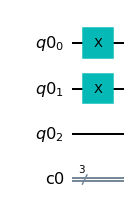

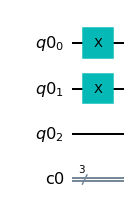

In [6]:
display(qc1.draw("mpl"),qc2.draw("mpl"))

In [7]:
# apply the quantum fourier transformation
qft = QFT(num_qubits=n)
qc2 = qc2.compose(qft)

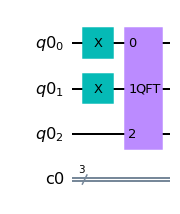

In [8]:
qc2.draw("mpl")

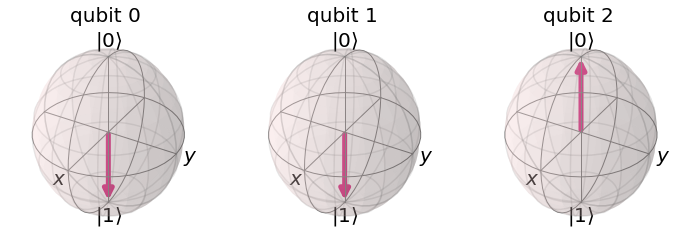

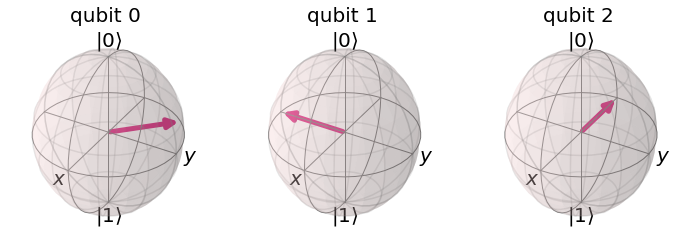

In [9]:
# compate block sphere of the two quantum circuit
display(plot_bloch_multivector(qc1),plot_bloch_multivector(qc2))

In [10]:
# see the actual quantum circuit for the qft
qc2.decompose().draw("mpl")
qc2.barrier()


In [11]:
# Inverse fourier transformation (fourier basis to x basis)
in_qft = QFT(num_qubits = n, inverse = True)
qc2 = qc2.compose(in_qft)

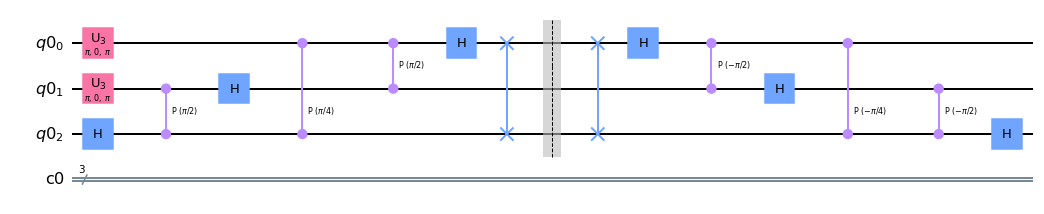

In [12]:
qc2.decompose().draw("mpl")

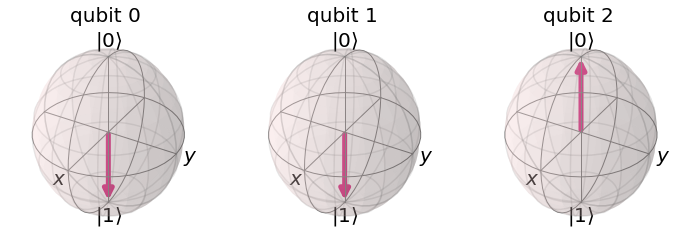

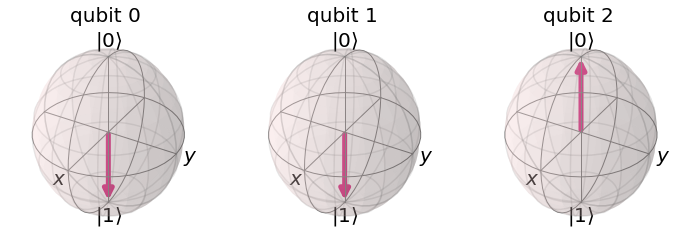

In [13]:
# the state should return from the fourier basis to the x basis
display(plot_bloch_multivector(qc1),plot_bloch_multivector(qc2))